In [20]:
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

In [2]:
file_names = gutenberg.fileids()
print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [3]:
doc_alice = gutenberg.open('carroll-alice.txt').read()
print(len(doc_alice), '\n')
print(doc_alice[:100])

144395 

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was


In [4]:
tokenizer = RegexpTokenizer(r"[\w']{2,}")
tokens = tokenizer.tokenize(doc_alice.lower())
print(tokens[:20])

["alice's", 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired']


In [5]:
eng_stops = set(stopwords.words('english'))
tokens = [token for token in tokens if token not in eng_stops]
print(tokens[:20])

["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


In [6]:
lemma = WordNetLemmatizer()
lemma_tokens = [lemma.lemmatize(token) for token in tokens]
print(lemma_tokens[:20])

["alice's", 'adventure', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


In [7]:
alice_word_count = dict()
for word in lemma_tokens:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1

print(alice_word_count)

{"alice's": 12, 'adventure': 7, 'wonderland': 3, 'lewis': 1, 'carroll': 1, '1865': 1, 'chapter': 12, 'rabbit': 47, 'hole': 5, 'alice': 385, 'beginning': 14, 'get': 44, 'tired': 7, 'sitting': 10, 'sister': 10, 'bank': 4, 'nothing': 30, 'twice': 5, 'peeped': 3, 'book': 13, 'reading': 3, 'picture': 5, 'conversation': 11, "'and": 56, 'use': 18, 'thought': 76, "'without": 1, 'considering': 3, 'mind': 11, 'well': 40, 'could': 77, 'hot': 7, 'day': 33, 'made': 30, 'feel': 8, 'sleepy': 5, 'stupid': 3, 'whether': 11, 'pleasure': 2, 'making': 8, 'daisy': 2, 'chain': 2, 'would': 78, 'worth': 4, 'trouble': 6, 'getting': 22, 'picking': 2, 'suddenly': 13, 'white': 30, 'pink': 1, 'eye': 36, 'ran': 16, 'close': 13, 'remarkable': 2, 'think': 53, 'much': 51, 'way': 57, 'hear': 14, 'say': 55, "'oh": 23, 'dear': 31, 'oh': 22, 'shall': 23, 'late': 6, 'afterwards': 2, 'occurred': 2, 'ought': 14, 'wondered': 1, 'time': 77, 'seemed': 27, 'quite': 55, 'natural': 4, 'actually': 1, 'took': 24, 'watch': 8, 'waistc

In [8]:
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)
for key in sorted_word_count[:20]:
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

'said': 462, 'alice': 385, 'little': 128, "'i": 126, 'one': 99, 'know': 90, 'like': 86, 'went': 83, 'thing': 80, 'would': 78, 'could': 77, 'time': 77, 'thought': 76, 'queen': 69, 'see': 67, 'king': 62, 'head': 59, 'turtle': 59, 'began': 58, 'way': 57, 

In [10]:
my_tagset = ['NN', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in pos_tag(lemma_tokens) if tag in my_tagset]

In [11]:
alice_word_count = dict()
for word in lemma_tokens:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1

print(alice_word_count)

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)
for key in sorted_word_count[:20]:
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

{"alice's": 12, 'adventure': 7, 'wonderland': 3, 'lewis': 1, 'carroll': 1, '1865': 1, 'chapter': 12, 'rabbit': 47, 'hole': 5, 'alice': 385, 'beginning': 14, 'get': 44, 'tired': 7, 'sitting': 10, 'sister': 10, 'bank': 4, 'nothing': 30, 'twice': 5, 'peeped': 3, 'book': 13, 'reading': 3, 'picture': 5, 'conversation': 11, "'and": 56, 'use': 18, 'thought': 76, "'without": 1, 'considering': 3, 'mind': 11, 'well': 40, 'could': 77, 'hot': 7, 'day': 33, 'made': 30, 'feel': 8, 'sleepy': 5, 'stupid': 3, 'whether': 11, 'pleasure': 2, 'making': 8, 'daisy': 2, 'chain': 2, 'would': 78, 'worth': 4, 'trouble': 6, 'getting': 22, 'picking': 2, 'suddenly': 13, 'white': 30, 'pink': 1, 'eye': 36, 'ran': 16, 'close': 13, 'remarkable': 2, 'think': 53, 'much': 51, 'way': 57, 'hear': 14, 'say': 55, "'oh": 23, 'dear': 31, 'oh': 22, 'shall': 23, 'late': 6, 'afterwards': 2, 'occurred': 2, 'ought': 14, 'wondered': 1, 'time': 77, 'seemed': 27, 'quite': 55, 'natural': 4, 'actually': 1, 'took': 24, 'watch': 8, 'waistc

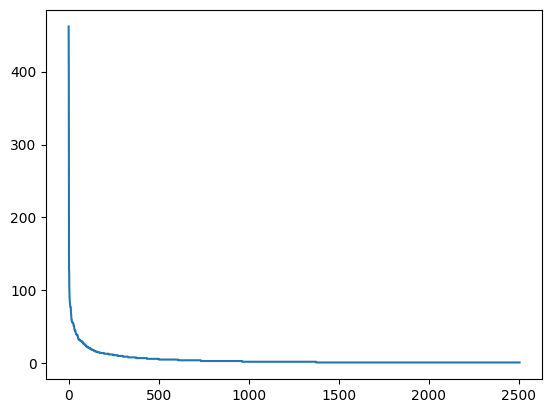

In [16]:
w = [alice_word_count[key] for key in sorted_word_count]
plt.plot(w)

<BarContainer object of 20 artists>

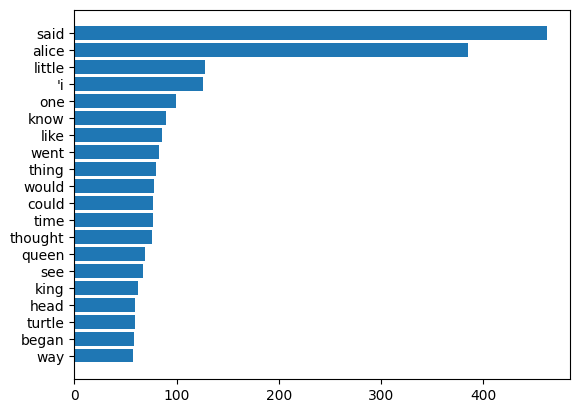

In [19]:
n = sorted_word_count[:20][::-1]
w = [alice_word_count[key] for key in n]
plt.barh(range(len(n)), w, tick_label=n)

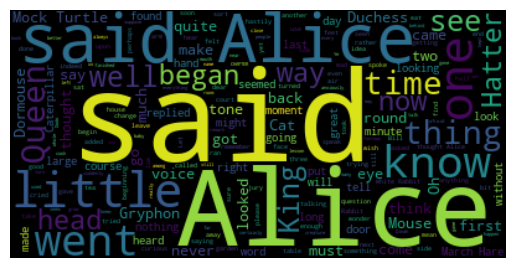

In [25]:
wordcloud = WordCloud().generate(doc_alice)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')

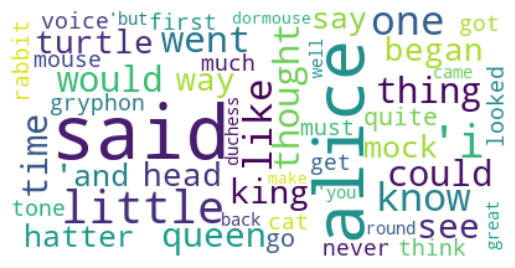

In [27]:
wordcloud = WordCloud(background_color='white', max_words=50, max_font_size=60).generate_from_frequencies(alice_word_count)
plt.figure()
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')